# Author: Shyam Vishnu

# Importing Neccessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
import joblib
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Create dataset

# Pipeline creation

Give a list of tuples. The tuples will have 2 values. Name and operation

In [51]:
#pipeline_xgb = Pipeline([('scalar')])

# Data Gathering, Visualization, Data types and formatting

In [2]:
# Read data
df = pd.read_csv('drug200.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Shape of Data frame
print(df.shape)

# Columns in data frame
print(df.columns)

# General information about data frame
print(df.info())

(200, 6)
Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


In [9]:
#Data types
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [10]:
#Describe data
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [11]:
#Describe categorical data
df.describe(include=['object', 'bool'])

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,DrugY
freq,104,77,103,91


In [12]:
#Duplicates

df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [13]:
#Value counts
#For categorical (type object) and boolean (type bool) features we can use the value_counts method
df['Age'].value_counts()

# you can see other columns as well
df['Sex'].value_counts()

# To calculate fractions
df['Drug'].value_counts(normalize=True)

DrugY    0.455
drugX    0.270
drugA    0.115
drugC    0.080
drugB    0.080
Name: Drug, dtype: float64

In [14]:
# Summary Tables
# Getting a cross tab of items
pd.crosstab(df['Drug'], df['Sex'])

Sex,F,M
Drug,,
DrugY,47,44
drugA,9,14
drugB,6,10
drugC,7,9
drugX,27,27


In [15]:
# Getting a cross tab of items in percentage share
pd.crosstab(df['Drug'], df['Sex'], normalize = True)

Sex,F,M
Drug,,
DrugY,0.235,0.220
drugA,0.045,0.070
drugB,0.030,0.050
drugC,0.035,0.045
drugX,0.135,0.135


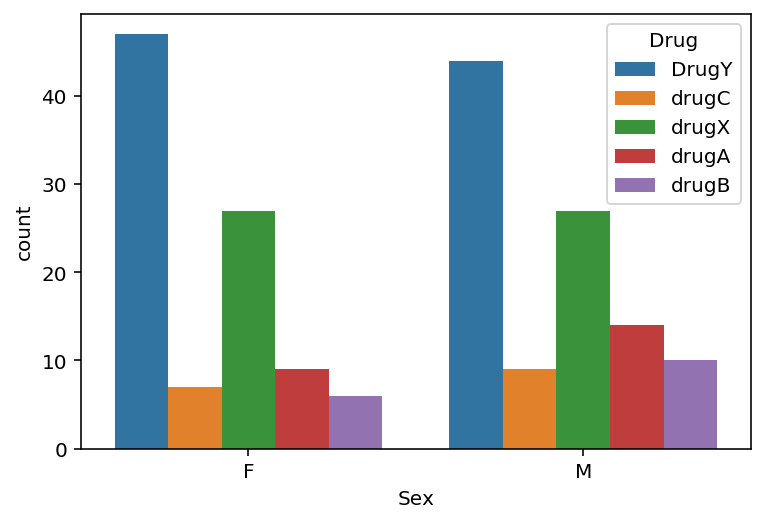

In [16]:
#Visualize data spread
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

sns.countplot(x='Sex', hue='Drug', data=df);

# Create new variable if neccessary

# Drop variables that are not useful for prediction

In [17]:
#df = df.drop(['name','host_name','host_id','id','last_review','reviews_per_month','neighbourhood' ,'latitude','longitude'], axis =1 )

# Defining X and Y

In [18]:
y = df['Drug'] # y_variable
x = df.drop(['Drug'],axis =1) #y_variable

### Convert Y to Numeric if necessary

In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
#list(le.classes_)
y = le.transform(y)
le.inverse_transform(y)

array(['DrugY', 'drugC', 'drugC', 'drugX', 'DrugY', 'drugX', 'DrugY',
       'drugC', 'DrugY', 'DrugY', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'DrugY', 'drugX', 'drugA', 'drugC', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugX',
       'DrugY', 'DrugY', 'drugX', 'drugB', 'drugX', 'DrugY', 'drugX',
       'drugX', 'drugA', 'drugX', 'drugX', 'drugX', 'DrugY', 'drugB',
       'DrugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugC', 'DrugY',
       'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugB', 'drugC',
       'drugB', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugA', 'DrugY',
       'drugX', 'drugB', 'DrugY', 'drugA', 'drugX', 'DrugY', 'DrugY',
       'drugB', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugA',
       'DrugY', 'drugA', 'drugX', 'drugB', 'drugX', 'drugC', 'drugA',
       'drugC', 'drugB', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'DrugY', 'Dru

# Converting remaining useful categorical variables to dummy variables

In [20]:
#Select all categorical variables
df.select_dtypes(include=['bool','object','category'])

x = pd.get_dummies(x , drop_first= True)
x


,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,0,0,0,0
1,47,13.093,1,1,0,0
2,47,10.114,1,1,0,0
3,28,7.798,0,0,1,0
4,61,18.043,0,1,0,0
...,...,...,...,...,...,...
195,56,11.567,0,1,0,0
196,16,12.006,1,1,0,0
197,52,9.894,1,0,1,0
198,23,14.020,1,0,1,1


# Data splitting into x train and y train 

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Missing data handling


In [22]:
# Count number of nulls
print(X_train.isna().sum())
print(X_test.isna().sum())


# Drop any y_train and y_test = NA



Age                   0
Na_to_K               0
Sex_M                 0
BP_LOW                0
BP_NORMAL             0
Cholesterol_NORMAL    0
dtype: int64
Age                   0
Na_to_K               0
Sex_M                 0
BP_LOW                0
BP_NORMAL             0
Cholesterol_NORMAL    0
dtype: int64


In [23]:
# Case deletion

#X_train = X_train.dropna()
#X_test = X_test.dropna()

In [24]:
# Replacing with median
#df['column name'] = np.where(df['column name']==0, df['column name'].median(),df['column name'] )

### Outlier handling

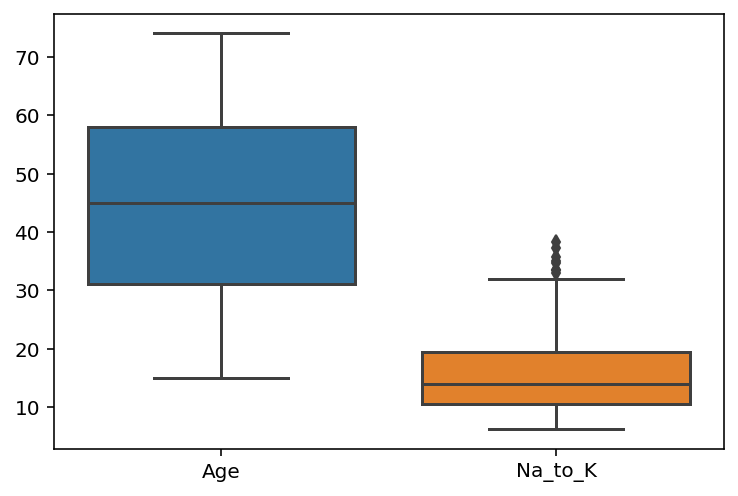

In [25]:
# Creating box plots!
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df)

In [26]:
Y_test

array([3, 4, 0, 0, 0, 4, 4, 4, 0, 4, 1, 0, 0, 0, 2, 3, 0, 0, 4, 0, 0, 4,
       4, 4, 0, 0, 0, 0, 0, 4, 4, 3, 1, 4, 0, 0, 4, 0, 1, 4])

### Sampling (using SMOTE)

In [27]:
# transform the dataset
#SMOTE works with classification variables only
# Not a numeric problem
oversample = SMOTE()
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

### Normalization / Standarization

In [28]:
# Normalization

In [29]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

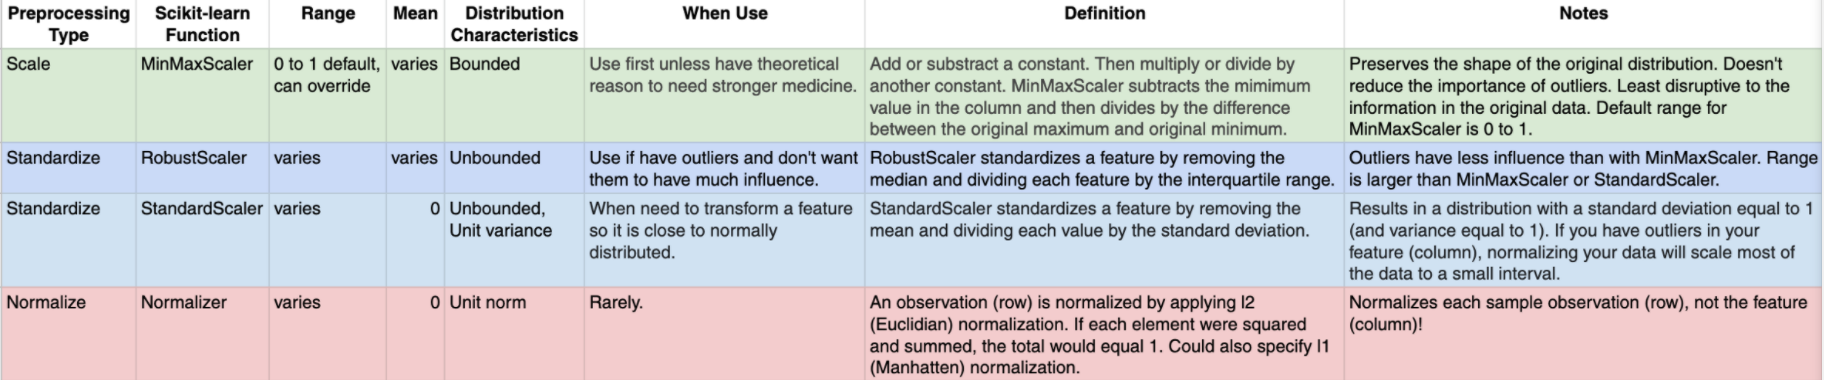

# Feature Selection

### Using Correlation and heatmap generation

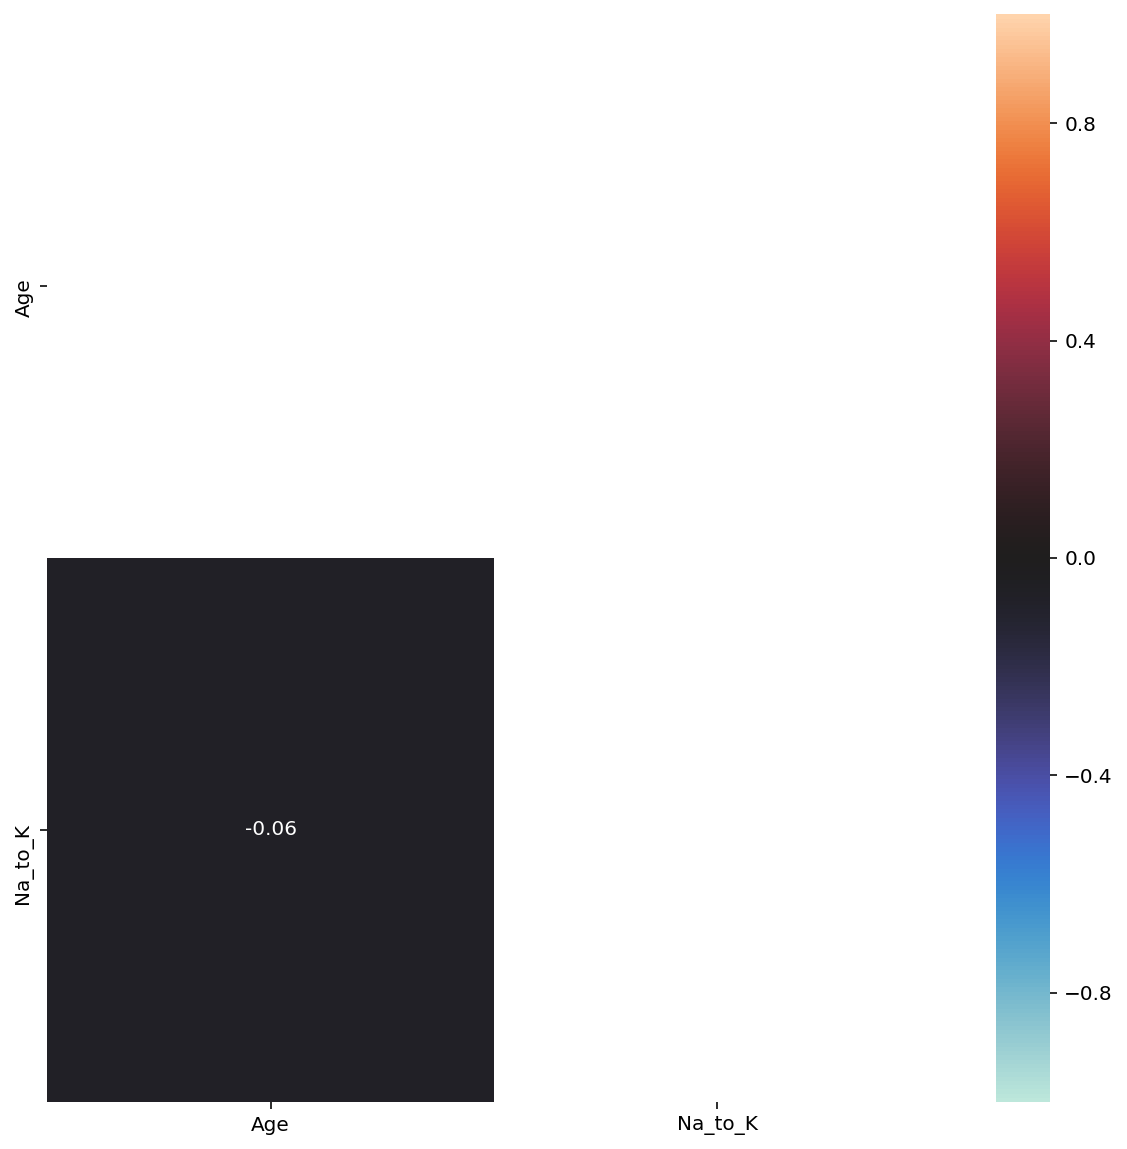

In [30]:
#Heatmap
corr = df.corr()
matrix = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True , fmt='.1g', vmin=-1, vmax=1, center= 0,mask = matrix)
plt.show()

In [31]:
# Another Style
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


### Wrapping Methods (Sequential feature selector) !



In [32]:
# Foward selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# Sequential Forward Selection(sfs)
sfs = SFS(LogisticRegression(),
          k_features=3,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [33]:
sfs.fit(X_train, Y_train)
sfs.k_feature_names_  

('Na_to_K', 'BP_LOW', 'BP_NORMAL')

In [34]:
# Backward selection
#Sequential backward selection(sbs)
sbs = SFS(LogisticRegression(),
         k_features=6,
         forward=False,
         floating=False,
         cv=0)
sbs.fit(X_train, Y_train)
sbs.k_feature_names_

('Age', 'Na_to_K', 'Sex_M', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_NORMAL')

In [35]:
#Both
sfs1 = SFS(LogisticRegression(),
         k_features=(1,6),
         forward=True,
         floating=False,
         cv=0)
sfs1.fit(X_train, Y_train)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(),
                          k_features=(1, 6))

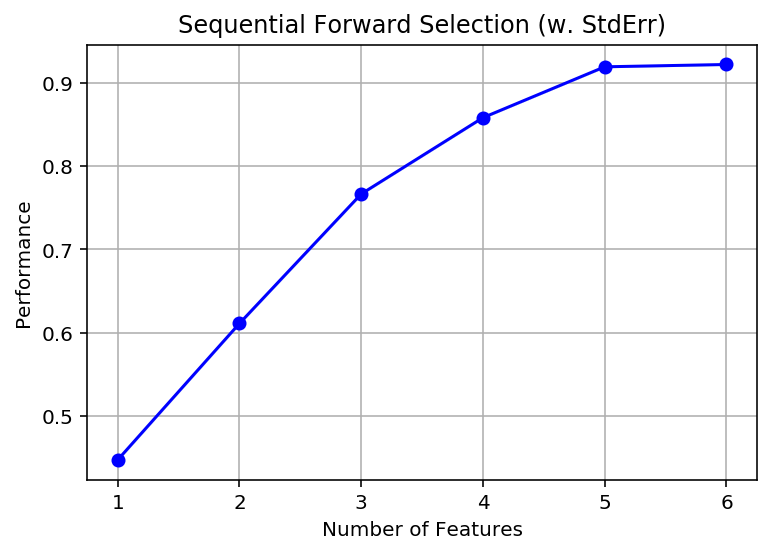

In [36]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

5 is the optimum number of features!

In [37]:
sfs = SFS(LogisticRegression(),
          k_features=5,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

sfs.fit(X_train, Y_train)
sfs.k_feature_names_  


('Na_to_K', 'Sex_M', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_NORMAL')

In [38]:
# Extra tree classifier

Reduce X train, Y train, X test, Y test to number the optimal features!

# Model with selected features

### Model

In [39]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

def evaluate_model(X_train, Y_train, model):
    model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    scores = cross_val_score(model, X_train, Y_train, cv=3, scoring="accuracy")
    diff = scores.mean() - model.score(X_test, Y_test)
    SD = diff / scores.std()
    #print(preds)
    print(f"Training Score:{model.score(X_train, Y_train)}")
    print(f"Cross V Score: {scores.mean()} +/- {scores.std()}")
    print(f"Testing Score: {model.score(X_test, Y_test)}")
    print(f"Cross & Test Diff: {diff}")
    print(f"Standard Deviations Away: {SD}")
    print(confusion_matrix(Y_test, preds))

### Logistic Regression

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
lr = LogisticRegression()

evaluate_model(X_train, Y_train, lr)

Training Score:0.9222222222222223
Cross V Score: 0.9 +/- 0.01360827634879543
Testing Score: 0.825
Cross & Test Diff: 0.07500000000000007
Standard Deviations Away: 5.511351921262157
[[16  1  0  1  1]
 [ 0  2  1  0  0]
 [ 0  1  0  0  0]
 [ 0  0  0  3  0]
 [ 2  0  0  0 12]]


In [41]:
preds = lr.predict(X_test)

In [42]:
#preds = le.inverse_transform(lr.predict(X_test))

In [43]:
Y_test1 = le.inverse_transform(Y_test)

### Classification Model

XGBoosting with HPO

In [44]:
#!pip install xgboost
import xgboost

classifier = xgboost.XGBClassifier()


params = {'max_depth' : [3,4,5],
    'learning_rate' : [0.05,0.1,0.2],
     'min_child_weight':[1,3,5],
    'gamma':[0.0,0.1,0.2,0.3,0.4],
         'colsample_bytree':[0.3,0.4]}


In [45]:
from sklearn.model_selection import RandomizedSearchCV

xgb_randomcv=RandomizedSearchCV(estimator=classifier,param_distributions=params,n_iter=5,cv=5,verbose=2,
                               random_state=100,n_jobs=-1)

In [46]:
xgb_randomcv.fit(X_train, Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:    5.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.0s finished


[14:18:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                    

Random forest

In [378]:
from sklearn.ensemble import RandomForestClassifier
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
rf = RandomForestClassifier()

evaluate_model(X_train, Y_train, rf)

Training Score:1.0
Cross V Score: 0.9555555555555556 +/- 0.021872244094477227
Testing Score: 0.975
Cross & Test Diff: -0.019444444444444375
Standard Deviations Away: -0.8890008890013313
[[19  0  0  0  0]
 [ 0  2  0  0  1]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 14]]


In [379]:
preds = rf.predict(X_test)
#preds = le.inverse_transform(lr.predict(X_test))
Y_test1 = le.inverse_transform(Y_test)

### Clustering model

Kmeans

DBSCSAN

# Hyperparameter Optimaztion

#### Manual Hyperparameter tests

In [ ]:
# Never use!



#### Randomized Search CV. Always the first option to reduce Grid search time!

In [386]:
# Defining n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
criterion=['gini','entropy']
max_depth=[int(x) for x in np.linspace(start = 1900, stop = 2000, num = 50)]
min_weight_fraction_leaf=[0.0]
max_features= ['auto','sqrt','log2',None]
min_impurity_decrease=[0.0]


random_grid = {'n_estimators': n_estimators,
               'criterion':criterion,
               'max_depth':max_depth,
               'min_weight_fraction_leaf':min_weight_fraction_leaf,
               'max_features': max_features,
               'min_impurity_decrease':min_impurity_decrease
               }

#print(random_grid)

from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1900, 1902, 1904, 1906,
                                                      1908, 1910, 1912, 1914,
                                                      1916, 1918, 1920, 1922,
                                                      1924, 1926, 1928, 1930,
                                                      1932, 1934, 1936, 1938,
                                                      1940, 1942, 1944, 1946,
                                                      1948, 1951, 1953, 1955,
                                                      1957, 1959, ...],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_impurity_decrea

In [389]:
# Getting the best parameters
best_random_grid=rf_randomcv.best_estimator_
rf_randomcv.best_params_


{'n_estimators': 1800,
 'min_weight_fraction_leaf': 0.0,
 'min_impurity_decrease': 0.0,
 'max_features': 'sqrt',
 'max_depth': 1961,
 'criterion': 'entropy'}

In [392]:
# Building the accuracy report!
from sklearn.metrics import accuracy_score, classification_report
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(Y_test,y_pred)))
print("Classification report: {}".format(classification_report(Y_test,y_pred)))

[[19  0  0  0  0]
 [ 0  2  0  0  1]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 14]]
Accuracy Score 0.975
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       0.93      1.00      0.97        14

    accuracy                           0.97        40
   macro avg       0.99      0.93      0.95        40
weighted avg       0.98      0.97      0.97        40



#### Grid Search CV

In [393]:
param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [1961], 'max_features': ['sqrt'], 'n_estimators': [1600, 1700, 1800, 1900, 2000]}


In [395]:
#### Fit the grid_search to the data
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,Y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   54.1s finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [1961],
                         'max_features': ['sqrt'],
                         'n_estimators': [1600, 1700, 1800, 1900, 2000]},
             verbose=2)

In [396]:
best_grid=grid_search.best_estimator_
best_grid

RandomForestClassifier(criterion='entropy', max_depth=1961, max_features='sqrt',
                       n_estimators=1600)

In [398]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(Y_test,y_pred)))
print("Classification report: {}".format(classification_report(Y_test,y_pred)))

[[19  0  0  0  0]
 [ 0  2  0  0  1]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 14]]
Accuracy Score 0.975
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       0.93      1.00      0.97        14

    accuracy                           0.97        40
   macro avg       0.99      0.93      0.95        40
weighted avg       0.98      0.97      0.97        40



#### Bayesian Optimization

In [ ]:
!pip install hyperopt

#### Genetic Algorithms, TPOT


In [401]:

import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(param)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [405]:
'''
!pip install tpot
from tpot import TPOTClassifier
tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict = {'sklearn.ensemble.RandomForestClassifier': param}, 
                                 cv = 4, scoring = 'accuracy')
tpot_classifier.fit(X_train,Y_train)

'''

"\n!pip install tpot\nfrom tpot import TPOTClassifier\ntpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,\n                                 verbosity= 2, early_stop= 12,\n                                 config_dict = {'sklearn.ensemble.RandomForestClassifier': param}, \n                                 cv = 4, scoring = 'accuracy')\ntpot_classifier.fit(X_train,Y_train)\n\n"

#### Keras Tuner!

# Model results

In [380]:
# Confusion Matrix
from sklearn import metrics
#confusion_matrix(Y_test,preds)
pred_prob = rf.predict_proba(X_test)

print(metrics.confusion_matrix(Y_test, preds))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(Y_test, preds))

[[19  0  0  0  0]
 [ 0  2  0  0  1]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       0.93      1.00      0.97        14

    accuracy                           0.97        40
   macro avg       0.99      0.93      0.95        40
weighted avg       0.98      0.97      0.97        40



In [349]:
#from sklearn.metrics import roc_curve
#from sklearn.metrics import roc_auc_score
# calculate roc curve
#fpr, tpr, thresholds = roc_curve(Y_train, preds)



# calculate AUC
#auc = roc_auc_score(Y_train, preds)
#print('AUC: %.3f' % auc)

In [350]:
# Either convert to binary classifaction and use above technique or use below technique after binarization of output!

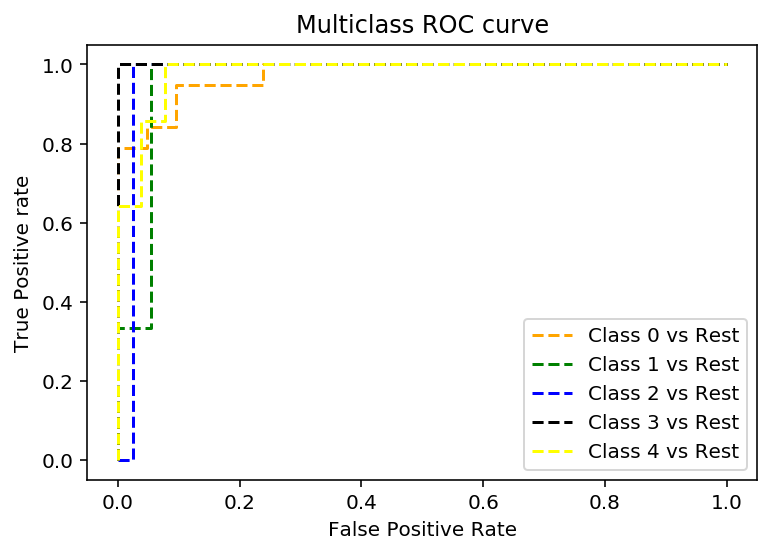

In [351]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='black', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='yellow', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    


Costs involved. Multiply Precision to Costs involved! Subtract FP and FN!

In [353]:
# Visualize model results

# Saving the model

In [52]:
# Save model
import pickle
with open('model_pickle','wb') as file:
    pickle.dump(xgb_randomcv,file)
    #model name and file

In [54]:
xgb_randomcv

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                    

In [53]:
#Load model                
with open('model_pickle','rb') as file:
    mp = pickle.load(file)  

In [55]:
mp

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                    

In [400]:
# Pipeline entire thing!